# Avocado Price Predicting Case study

Problem Statement:
Avocado is a fruit consumed by people heavily in the United States.
Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. 
Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags.

Loading the required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

Uploading the the data set

In [204]:
data =pd.read_csv('avocado.csv')

In [205]:
ds=pd.DataFrame(data=data)
ds

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,12/27/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,12/20/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,12/13/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,12/6/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,11/29/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2/4/2018,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,1/28/2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,1/21/2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,1/14/2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


# EDA

In [206]:
ds.shape

(18249, 14)

In [207]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


There are 18249 rows and 14 columns, region is object type variable. Target varibale is continous and interger type.
There are three object type and 11 int type variables.

In [208]:
# Checking missing values
data.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

There is no missing values

<AxesSubplot:>

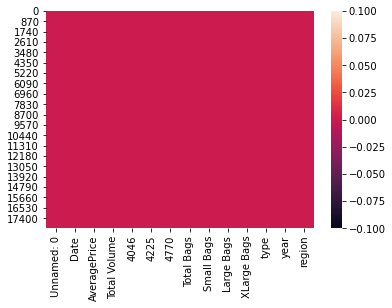

In [209]:
sns.heatmap(ds.isnull())

The heat map also shows There is no missing values

# Summary Statistics

In [210]:
ds.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


Key Observations 1)There is diifernce between mean and median(50%) in few columns all of the column 2)Thers is large differnce between the values of 75% aand 'max' in some of the columns. **which show that there are outliers and sknweness in the dataset. 3) XLargeBags,Total Bags rate and small Bags has high standard deviation.

In [211]:
# droping the column unnamed from dataset 
ds.drop(['Unnamed: 0'],axis=1,inplace=True)

<AxesSubplot:xlabel='type', ylabel='count'>

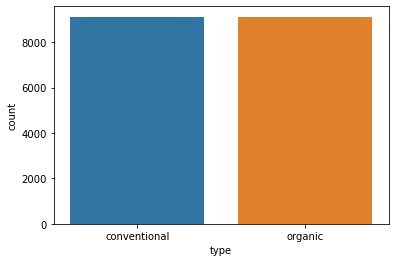

In [212]:
sns.countplot(x='type',data=ds)

Type is equally distributed between conventional and organic

<AxesSubplot:xlabel='year', ylabel='count'>

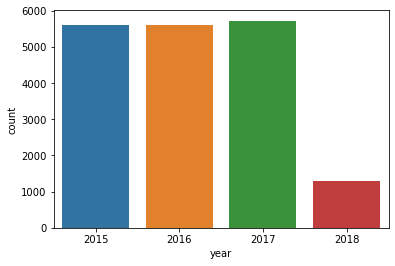

In [213]:
sns.countplot(x='year',data=ds)

Key Observation: Avocado was least consumed in the 2018 year.

In [214]:
ds['region'].value_counts()

West                   338
CincinnatiDayton       338
Spokane                338
SouthCarolina          338
Southeast              338
Pittsburgh             338
Orlando                338
RichmondNorfolk        338
Tampa                  338
Seattle                338
Roanoke                338
Louisville             338
TotalUS                338
Albany                 338
Plains                 338
GreatLakes             338
Philadelphia           338
Sacramento             338
Jacksonville           338
StLouis                338
Charlotte              338
Midsouth               338
SanFrancisco           338
Nashville              338
LasVegas               338
Boston                 338
BuffaloRochester       338
Columbus               338
Houston                338
Atlanta                338
Syracuse               338
California             338
HartfordSpringfield    338
SanDiego               338
Chicago                338
NewOrleansMobile       338
Portland               338
D

<AxesSubplot:>

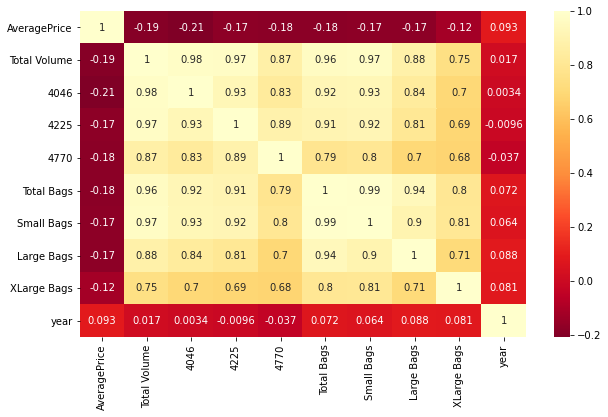

In [215]:
# Correlation Matrix ---Pearson Method
dfcor=ds.corr()
plt.figure(figsize=(10,6))
sns.heatmap(dfcor,cmap="YlOrRd_r",annot=True)

Key observation: 1)None of the variable has strong correlation with Average Price,instead most of them are correlated with each other.
2)Total Volume highly postively correlated with 4046,smallBags and Large Bags.Least correlated with XlargeBags.
3) 4046,4770,4225 have strong postive correlation among each others.

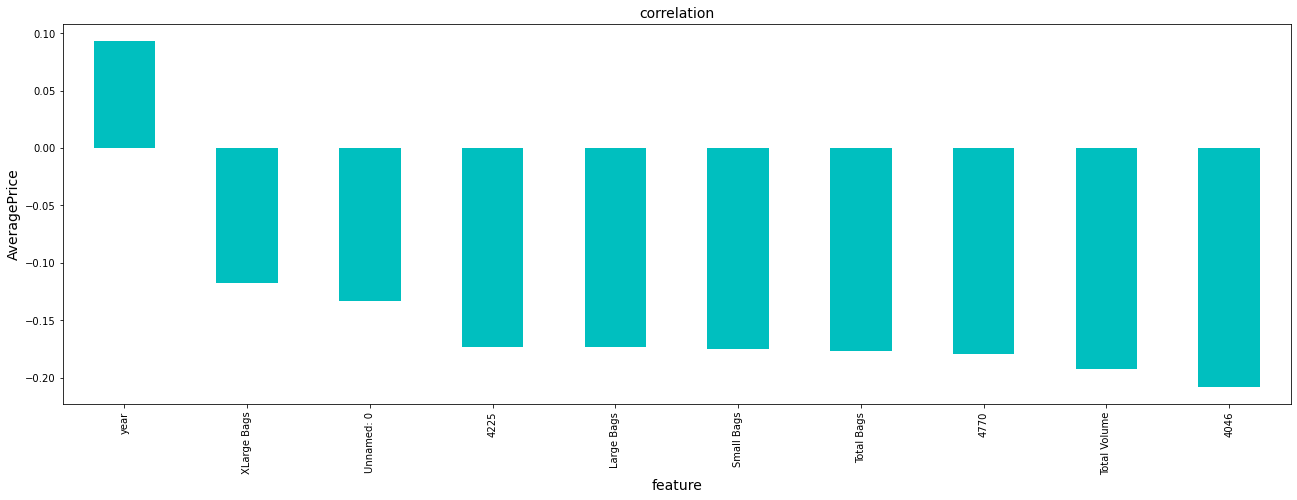

In [216]:
plt.figure(figsize=(22,7))
data.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind='bar',color='c')
plt.xlabel('feature',fontsize=14)
plt.ylabel('AveragePrice',fontsize=14)
plt.title('correlation',fontsize =14)
plt.show()

Key Observation: Year variable is the only positively Correlated, rest are negatively correlated with target variabel.
2) 4046,Total Volume, 4770,Tota bags 4225  are most negatively correlated to the Avg Price.

In [217]:
#sns.pairplot(ds)

Avergae price seems to have week relationship with rest of the variables.
Total bags and smaal bag have positive linear relationship.
Total volume have strong positive linear relationship with 4046,4225,4770,Total Bags,Small Bags,Large Bags.

# Finding Outliers and Skewness

AveragePrice       AxesSubplot(0.125,0.125;0.0466867x0.755)
Total Volume    AxesSubplot(0.181024,0.125;0.0466867x0.755)
4046            AxesSubplot(0.237048,0.125;0.0466867x0.755)
4225            AxesSubplot(0.293072,0.125;0.0466867x0.755)
4770            AxesSubplot(0.349096,0.125;0.0466867x0.755)
Total Bags       AxesSubplot(0.40512,0.125;0.0466867x0.755)
Small Bags      AxesSubplot(0.461145,0.125;0.0466867x0.755)
Large Bags      AxesSubplot(0.517169,0.125;0.0466867x0.755)
XLarge Bags     AxesSubplot(0.573193,0.125;0.0466867x0.755)
year            AxesSubplot(0.629217,0.125;0.0466867x0.755)
dtype: object

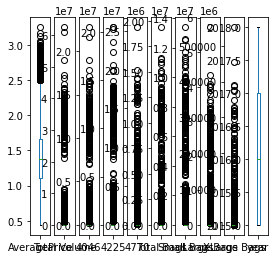

In [218]:
# Box plot for all coulmns
ds.plot(kind='box',subplots=True,layout=(1,14))

We can see there are outliers in most of the column except 'Year'.Lets check separately for each column

<AxesSubplot:>

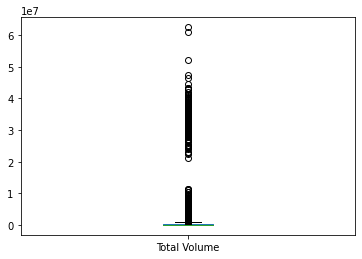

In [219]:
ds['Total Volume'].plot.box()

<AxesSubplot:>

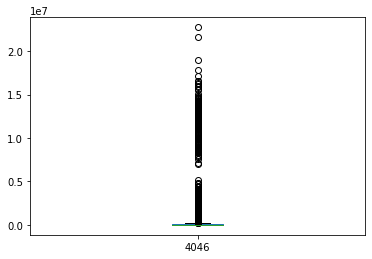

In [220]:
ds['4046'].plot.box()

<AxesSubplot:>

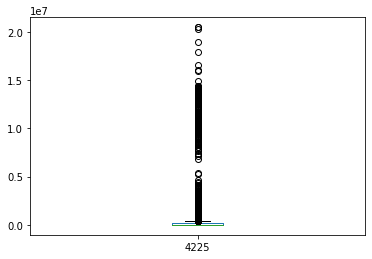

In [221]:
ds['4225'].plot.box()

<AxesSubplot:>

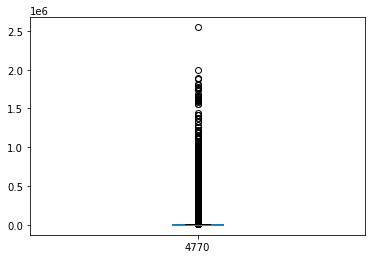

In [222]:
ds['4770'].plot.box()

<AxesSubplot:>

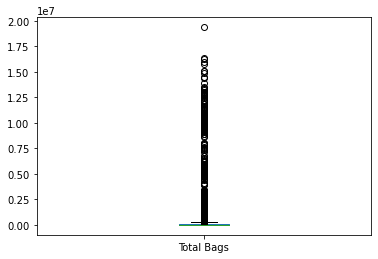

In [223]:
ds['Total Bags'].plot.box()

<AxesSubplot:>

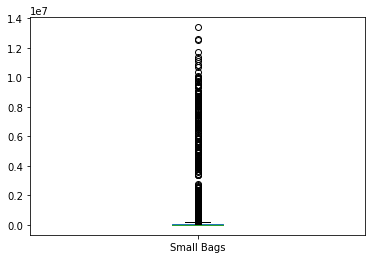

In [224]:
ds['Small Bags'].plot.box()

<AxesSubplot:>

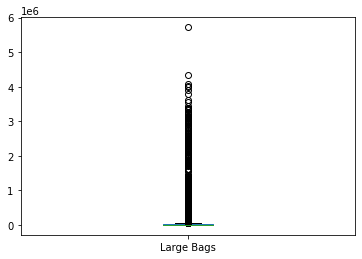

In [225]:
ds['Large Bags'].plot.box()

<AxesSubplot:>

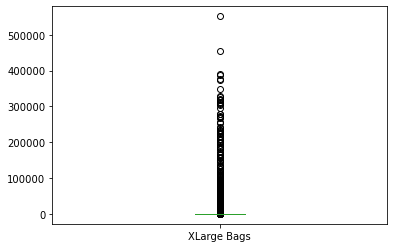

In [226]:
ds['XLarge Bags'].plot.box()

We can depict from the above figure that there are outliers in all the columns excpet year, however we are not going to remove the outliers from objet type variabels and target variabel..

In [227]:
#Checkking skewness
ds.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
dtype: float64

Keeping the skewness range +0.5/-0.5, then we can see there are skweness in most of the columns. columns.Lets reduce the skewness from above features.

# Data Wrangling

In [273]:
# Lets do feature engineering on date
ds['Date']=pd.to_datetime(ds['Date'])
ds['Month']=ds['Date'].apply(lambda x:x.month)
ds['Day']=ds['Date'].apply(lambda x:x.day)

In [274]:
ds.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [228]:
# Defining data frame having int type variables having outliers, excluding obj type variables
m=ds[['Total Volume','4046','4225',
      '4770','Total Bags','Small Bags','Large Bags',
      'XLarge Bags']]

In [229]:
#Handling the Outliers.Removing the outliers.
from scipy.stats import zscore
z=np.abs(zscore(m))
z
threshold=3
print(np.where(z>3))

(array([ 346,  359,  780, ..., 9111, 9112, 9113], dtype=int64), array([1, 1, 7, ..., 6, 6, 6], dtype=int64))


In [230]:
# lets check the presence of outlier
print('shape before remooving the outliers:',ds.shape)
dsnew=ds[(z<3).all(axis=1)]

print('shape after remooving the outliers:',dsnew.shape)
# here 467 rows will be droped

shape before remooving the outliers: (18249, 13)
shape after remooving the outliers: (17782, 13)


In [231]:
# shape after outlier removal
dsnew.shape

(17782, 13)

In [232]:
# Checking skewness after outlier removal
dsnew.skew()

AveragePrice    0.560969
Total Volume    3.782060
4046            4.928850
4225            4.472729
4770            5.137120
Total Bags      4.082103
Small Bags      4.238647
Large Bags      5.072468
XLarge Bags     6.159391
year            0.220792
dtype: float64

The Skewness has reduce significantly after outlier removal but still there is skewness present in the variables.

<AxesSubplot:xlabel='Total Volume', ylabel='Count'>

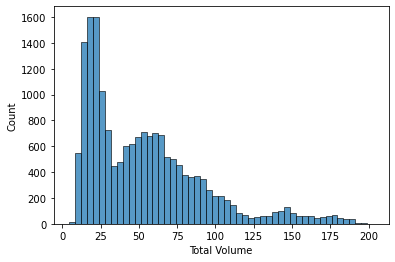

In [233]:
dsnew['Total Volume']=np.cbrt(dsnew['Total Volume'])
sns.histplot(dsnew['Total Volume'])

<AxesSubplot:xlabel='4046', ylabel='Count'>

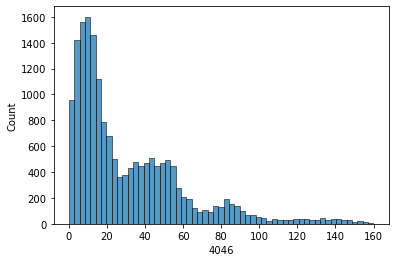

In [234]:
dsnew['4046']=np.cbrt(dsnew['4046'])
sns.histplot(dsnew['4046'])

<AxesSubplot:xlabel='4225', ylabel='Count'>

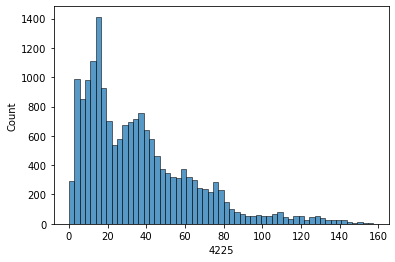

In [235]:
dsnew['4225']=np.cbrt(dsnew['4225'])
sns.histplot(dsnew['4225'])

<AxesSubplot:xlabel='4770', ylabel='Count'>

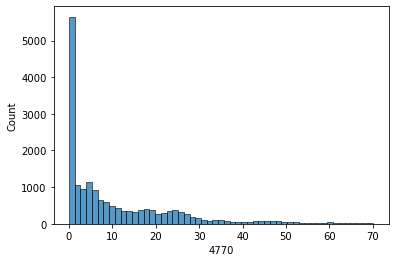

In [236]:
dsnew['4770']=np.cbrt(dsnew['4770'])
sns.histplot(dsnew['4770'])

<AxesSubplot:xlabel='Total Bags', ylabel='Count'>

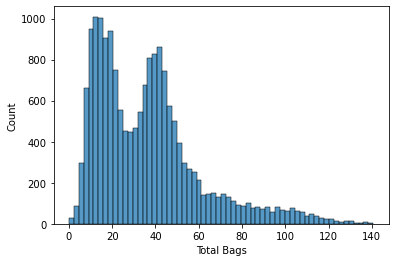

In [237]:
dsnew['Total Bags']=np.cbrt(dsnew['Total Bags'])
sns.histplot(dsnew['Total Bags'])

<AxesSubplot:xlabel='Small Bags', ylabel='Count'>

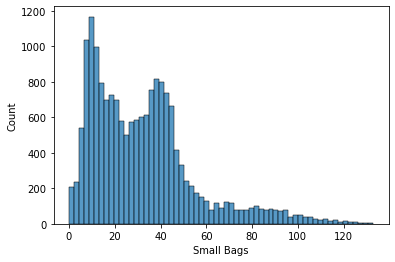

In [238]:
dsnew['Small Bags']=np.cbrt(dsnew['Small Bags'])
sns.histplot(dsnew['Small Bags'])

<AxesSubplot:xlabel='Large Bags', ylabel='Count'>

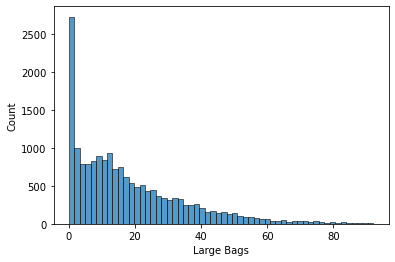

In [239]:
dsnew['Large Bags']=np.cbrt(dsnew['Large Bags'])
sns.histplot(dsnew['Large Bags'])

<AxesSubplot:xlabel='XLarge Bags', ylabel='Count'>

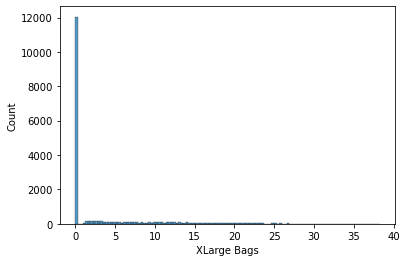

In [240]:
dsnew['XLarge Bags']=np.cbrt(dsnew['XLarge Bags'])
sns.histplot(dsnew['XLarge Bags'])

In [241]:
dsnew.skew()

AveragePrice    0.560969
Total Volume    1.248634
4046            1.564617
4225            1.286719
4770            1.645148
Total Bags      1.237136
Small Bags      1.251353
Large Bags      1.282704
XLarge Bags     2.288933
year            0.220792
dtype: float64

In [242]:
#Encoding the categorical varibales
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
for i in dsnew.columns:
    if dsnew[i].dtypes=='object':
        dsnew[i]=oe.fit_transform(dsnew[i].values.reshape(-1,1))
dsnew

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,53.0,1.33,40.049235,10.120997,37.903460,3.638275,20.564634,20.490870,4.534711,0.0,0.0,2015,0.0
1,50.0,1.35,38.001150,8.768933,35.473513,3.878204,21.183249,21.110581,4.602425,0.0,0.0,2015,0.0
2,47.0,0.93,49.079175,9.262632,47.790416,5.072283,20.120399,20.035113,4.689671,0.0,0.0,2015,0.0
3,57.0,1.08,42.906983,10.421946,41.597133,4.171309,17.978534,17.839520,5.114173,0.0,0.0,2015,0.0
4,41.0,1.28,37.093893,9.800999,35.260208,4.231732,18.355039,18.157325,5.825433,0.0,0.0,2015,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,70.0,1.63,25.750488,12.697058,11.520945,0.000000,23.810234,23.553564,7.558651,0.0,1.0,2018,53.0
18245,11.0,1.71,24.037003,10.602029,15.083241,0.000000,21.002902,20.754542,6.873934,0.0,1.0,2018,53.0
18246,7.0,1.87,23.966829,10.602681,13.486113,8.995636,21.100134,21.068409,3.484558,0.0,1.0,2018,53.0
18247,3.0,1.93,25.305697,11.517001,14.392048,8.991803,22.219254,22.185443,3.684031,0.0,1.0,2018,53.0


In [243]:
dsnew.shape

(17782, 13)

Creating feature and target dataframe

In [250]:
x=dsnew.drop(columns=['AveragePrice'])
y=dsnew['AveragePrice']

In [251]:
x.shape

(17782, 11)

In [252]:
y.shape

(17782,)

In [253]:
# To find the best random state using Linear Regressor model

from sklearn.metrics import r2_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    mod= LinearRegression()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print ('best r2 score is',maxAccu,'on random state',maxRS)

best r2 score is 0.5161698395103087 on random state 159


In [254]:
# Sending the data for train and test using Train_test_Split 
# 30 % data will go for testing and 70% data will go for training the model
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(12447, 11)
(5335, 11)
(12447,)
(5335,)


70% of the data (12447 rows) will be available for training the model & 30% (5335 rows) will be available for testing the model

# Model Building & Evaluation

Since the target variable as continuous values we can build the regression models. Therefore oue evalution criteria will be: Evaluation Matrics : MAE,MSE,RMSE and R2 Score

In [255]:
lm=LinearRegression()
lm.fit(x_train,y_train)
lm.score(x_train,y_train)

0.48723620886319063

In [256]:
lm.coef_

array([-0.01647815,  0.00412389,  0.01451672, -0.0014989 , -0.01856504,
        0.01970732,  0.004358  ,  0.00660205,  0.39771782,  0.06181823,
        0.00087237])

In [257]:
lm.intercept_

-123.26724411629765

In [258]:
from sklearn.metrics import r2_score
pred=lm.predict(x_test)
print('Coefficient of determination',r2_score(y_test,pred))
print('mean absolute arror',mean_absolute_error(y_test,pred))
print('mean squarred arror',mean_squared_error(y_test,pred))
print('Root mean square arror',np.sqrt(mean_squared_error(y_test,pred)))

Coefficient of determination 0.5161698395103087
mean absolute arror 0.22204958030620722
mean squarred arror 0.08308240998484598
Root mean square arror 0.2882401949500555


In [259]:
# Decision Tree Regression Model
dc=DecisionTreeRegressor()
dc.fit(x_train,y_train)
dc.score(x_train,y_train)

1.0

In [260]:
from sklearn.metrics import r2_score
pred=dc.predict(x_test)
print('Coefficient of determination',r2_score(y_test,pred))
print('mean absolute error',mean_absolute_error(y_test,pred))
print('mean squarred error',mean_squared_error(y_test,pred))
print('Root mean square error',np.sqrt(mean_squared_error(y_test,pred)))

Coefficient of determination 0.679207949927262
mean absolute error 0.1512839737582006
mean squarred error 0.05508581068416119
Root mean square error 0.2347036656811333


In [261]:
# KNeighbors Regression Model
kn=KNeighborsRegressor()
kn.fit(x_train,y_train)
kn.score(x_train,y_train)

0.887066305736214

In [262]:
from sklearn.metrics import r2_score
pred=kn.predict(x_test)
print('Coefficient of determination',r2_score(y_test,pred))
print('mean absolute error',mean_absolute_error(y_test,pred))
print('mean squarred error',mean_squared_error(y_test,pred))
print('Root mean square error',np.sqrt(mean_squared_error(y_test,pred)))

Coefficient of determination 0.8195041146861128
mean absolute error 0.11804461105904406
mean squarred error 0.030994415745079662
Root mean square error 0.1760523096840245


In [263]:
# Support Vector Regressor Model
from sklearn.svm import SVR
# Decision Tree Regression Model
svr=SVR(kernel='rbf')
svr.fit(x_train,y_train)
svr.score(x_train,y_train)

0.33663256469724023

In [264]:
pred=svr.predict(x_test)
print('Coefficient of determination',r2_score(y_test,pred))
print('mean absolute error',mean_absolute_error(y_test,pred))
print('mean squarred error',mean_squared_error(y_test,pred))
print('Root mean square error',np.sqrt(mean_squared_error(y_test,pred)))

Coefficient of determination 0.3512511297283927
mean absolute error 0.2582492309590517
mean squarred error 0.11140194229015979
Root mean square error 0.33376929500803365


In [265]:
# Random Forest Regression Model
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
rf.score(x_train,y_train)

0.9771149715559055

In [266]:
from sklearn.metrics import r2_score
pred=rf.predict(x_test)
print('Coefficient of determination',r2_score(y_test,pred))
print('mean absolute error',mean_absolute_error(y_test,pred))
print('mean squarred error',mean_squared_error(y_test,pred))
print('Root mean square error',np.sqrt(mean_squared_error(y_test,pred)))

Coefficient of determination 0.8416267269044376
mean absolute error 0.11299583880037489
mean squarred error 0.02719556216307404
Root mean square error 0.16491077030647222


Based on the results of above models, and capomaring the R2 score and other evalution matrics result of MAE,MSE and RMSE.We can find the Random Forest Regression model is best model to predict the AveragePrice. 
Since the Random Forest model has the second hishest score(0.98) and R2 score(0.87) and lowest values of MAE, MSE,RMSE  among other four models build above, it is the best model among the above five models.

# Improving the model accuracy using cross Validation

In [267]:
from sklearn.model_selection import cross_val_score
lmscores =cross_val_score(lm,x,y,cv=5)
print(lmscores)
print(lmscores.mean(),lmscores.std())

[-0.06732628  0.18053615  0.37551932  0.13406455  0.13998315]
0.15255537522472962 0.1409565606793847


In [268]:
from sklearn.model_selection import cross_val_score
dcscores =cross_val_score(dc,x,y,cv=5)
print(dcscores)
print(dcscores.mean(),dcscores.std())

[-0.85310213 -0.27772012  0.04164304 -0.49030105 -0.2912126 ]
-0.374138570543328 0.29392087362483676


In [269]:
from sklearn.model_selection import cross_val_score
knnscores =cross_val_score(kn,x,y,cv=5)
print(knnscores)
print(knnscores.mean(),knnscores.std())

[-0.79599799  0.30354931  0.39354713  0.03252132 -0.0609275 ]
-0.02546154621664487 0.42003873099612155


In [270]:
from sklearn.model_selection import cross_val_score
rfscores =cross_val_score(rf,x,y,cv=5)
print(rfscores)
print(rfscores.mean(),rfscores.std())

[0.24067382 0.31549891 0.5563136  0.27167681 0.03772579]
0.28437778493182103 0.16602781021322247


In [203]:
from sklearn.model_selection import cross_val_score
svrscores =cross_val_score(svr,x,y,cv=5)
print(svrscores)
print(svrscores.mean(),svrscores.std())

[-0.31782729  0.42409647  0.20109999  0.33327764  0.11443011]
0.15101538491073135 0.25746969306653045


It can be observed that the "Random Forest Regressor" algorithim has the almost some positive accuracy score after the cross validation. So the best model with highet accuracy score and best on evalution with other matrix is "Random" is the best model for predicting the Average Price.

# Hyper Parameter Tuning

In [284]:
from sklearn.model_selection import GridSearchCV 
parameter={'max_depth':np.arange(5,10),'criterion':['mse', 'mae']}

In [285]:
GCV=GridSearchCV(RandomForestRegressor(),parameter,cv=3)

In [286]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': array([5, 6, 7, 8, 9])})

In [287]:
GCV.best_params_

{'criterion': 'mse', 'max_depth': 9}

In [289]:
rf_final=RandomForestRegressor(max_depth=9,criterion='mse',max_features='auto')
rf_final.fit(x_train,y_train)
rf_final.score(x_train,y_train)

0.8133216665680412

In [290]:
from sklearn.metrics import r2_score
pred=rf_final.predict(x_test)
print('Coefficient of determination',r2_score(y_test,pred))
print('mean absolute error',mean_absolute_error(y_test,pred))
print('mean squarred error',mean_squared_error(y_test,pred))
print('Root mean square error',np.sqrt(mean_squared_error(y_test,pred)))

Coefficient of determination 0.7590825811330735
mean absolute error 0.14702671743117177
mean squarred error 0.04136988844708314
Root mean square error 0.20339589092969196


# Saving the Best Model

Lets save the best model "Random Forest Regression Model

In [291]:
import joblib
joblib.dump(rf_final,'Model_Avacado.obj')

['Model_Avacado.obj']